In [85]:
# For data operations :-
import pandas as pd

# For numerical operations :-
import numpy as np
# Data Visualization :-
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine Learning Algorithms
import sklearn
import imblearn # For imbalanced Data
from sklearn.impute import KNNImputer



In [86]:
data=pd.read_csv('/content/train_u6lujuX_CVtuZ9i (1).csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [87]:
data.shape

(614, 13)

In [88]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [89]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# ***Descriptive Stats***


In [90]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [91]:
data.describe(include='object')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [92]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [93]:
# The Output data is imbalanced :-

data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

# ***DATA CLEANING***

In [94]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [95]:
# Filling the Nulls :-

def fillwithmode(col):
  return data[col].fillna(value=data[col].mode()[0])

def fillwithmedian(col):
  return data[col].fillna(value=data[col].median())

In [96]:
categoric_cols = ['Gender', 'Married', 'Dependents', 'Self_Employed']
numeric_cols=['LoanAmount', 'Loan_Amount_Term', 'Credit_History']

for col in categoric_cols:
  data[col]=fillwithmode(col)

for col in numeric_cols:
  data[col]=fillwithmedian(col)

In [97]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [98]:
# Checking the Mode and Medians of cols having Nulls :-

filled_collection={}

for col in categoric_cols:
  filled_collection[col]=data[col].mode()[0]

for col in numeric_cols:
  filled_collection[col]=data[col].median()

In [99]:
filled_collection

{'Gender': 'Male',
 'Married': 'Yes',
 'Dependents': '0',
 'Self_Employed': 'No',
 'LoanAmount': 128.0,
 'Loan_Amount_Term': 360.0,
 'Credit_History': 1.0}

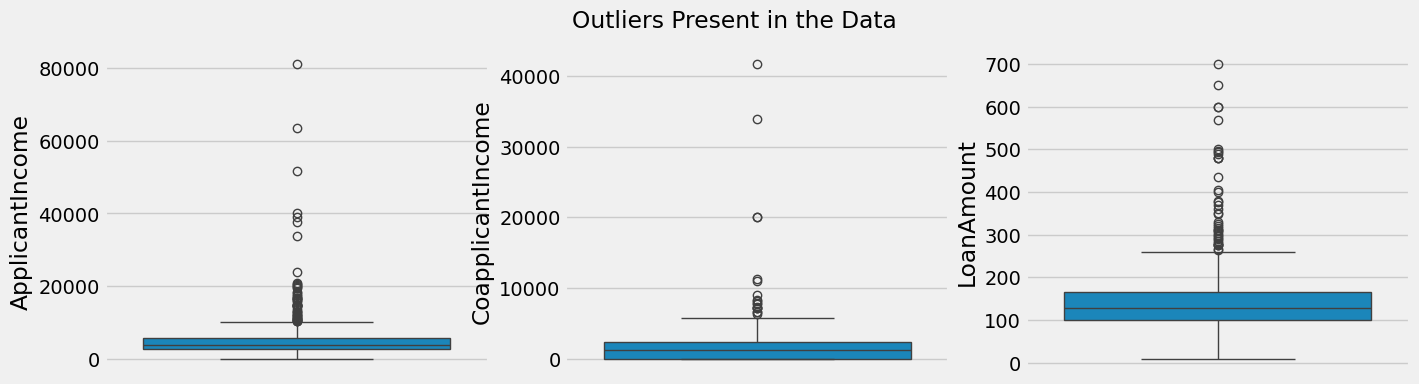

In [100]:
# Visualizing the Outliers in the Data using the Boxplot :-

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1,3,1)
sns.boxplot(data['ApplicantIncome'])

plt.subplot(1,3,2)
sns.boxplot(data['CoapplicantIncome'])

plt.subplot(1,3,3)
sns.boxplot(data['LoanAmount'])

plt.suptitle('Outliers Present in the Data')
plt.show()

In [101]:
# Detecting and fixing the Outliers :-

def detectoutlierszscore(data,col):
  mean=data[col].mean()
  std=data[col].std()
  high_threshold=mean+3*std
  low_threshold=mean-3*std

  print('Upper_Limit : ',high_threshold,'\n','Lower_Limit : ',low_threshold)

  outliers=np.logical_or(data[col].values>high_threshold,data[col].values<low_threshold)
  idxs=np.where(outliers)[0]

  print('Outliers_Present : ',len(idxs))

  plt.plot([high_threshold]*data.shape[0])
  plt.plot([low_threshold]*data.shape[0])
  plt.scatter(x=[i for i in range(data.shape[0])],y=data[col].values)
  plt.xlabel('Data_Points')
  plt.ylabel(col)
  plt.title(f'Outliers in {col}')
  plt.show()

  print('Fixing_Outliers :- ')

  data.loc[idxs,col]=np.nan
  imputer=KNNImputer()
  data.loc[:,col]=imputer.fit_transform(data.loc[:,col].values.reshape(-1,1))

  plt.plot([high_threshold]*data.shape[0])
  plt.plot([low_threshold]*data.shape[0])
  plt.scatter(x=[i for i in range(data.shape[0])],y=data[col].values)
  plt.xlabel('Data_Points')
  plt.ylabel(col)
  plt.title(f'Outliers in {col}')
  plt.show()

  return data


Upper_Limit :  23730.584303549156 
 Lower_Limit :  -12923.66573677391
Outliers_Present :  8


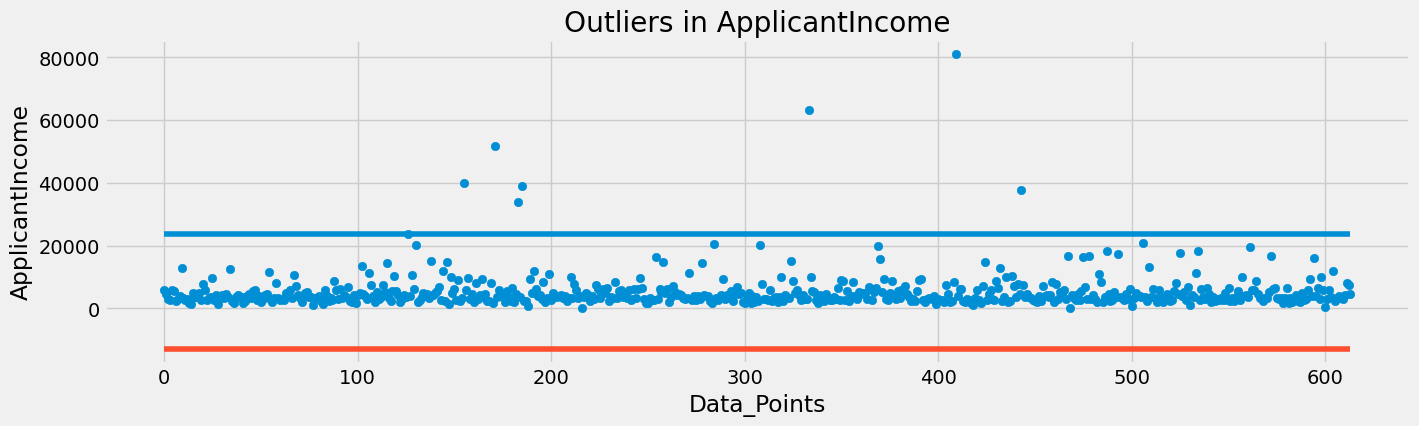

Fixing_Outliers :- 


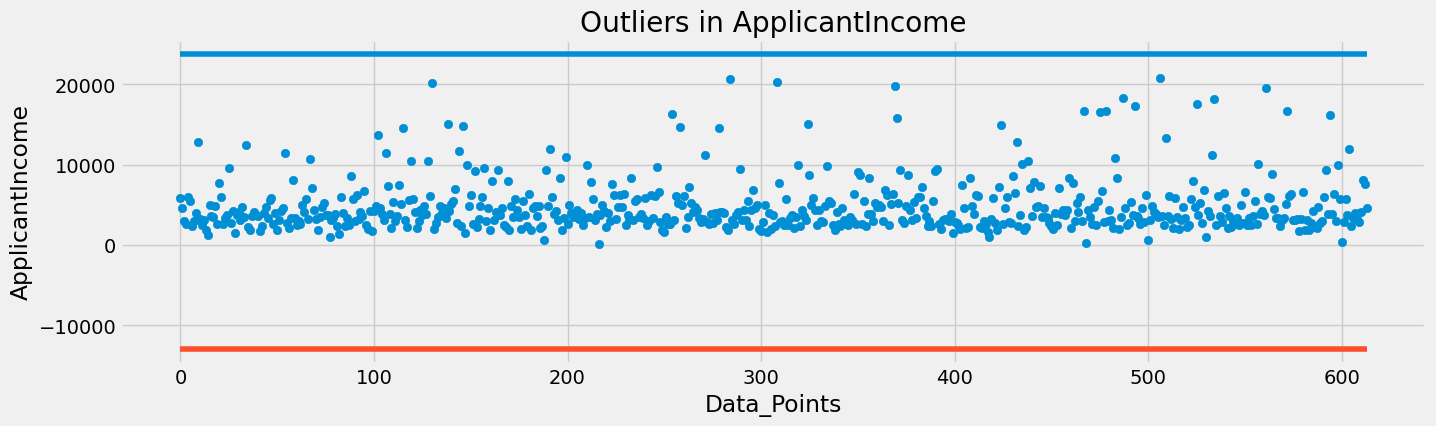

Upper_Limit :  10399.990905699668 
 Lower_Limit :  -7157.4993096454655
Outliers_Present :  6


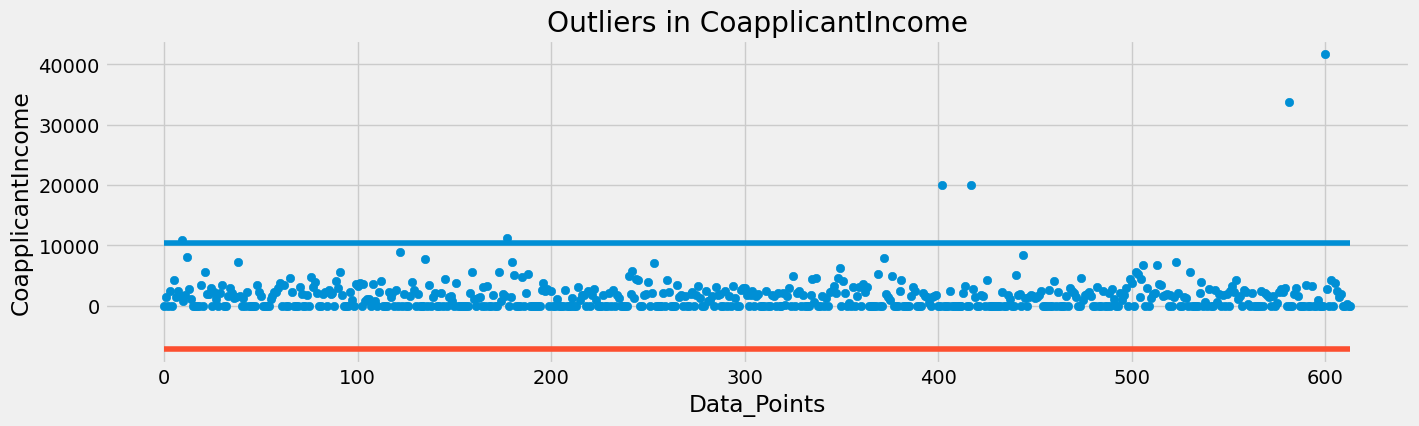

Fixing_Outliers :- 


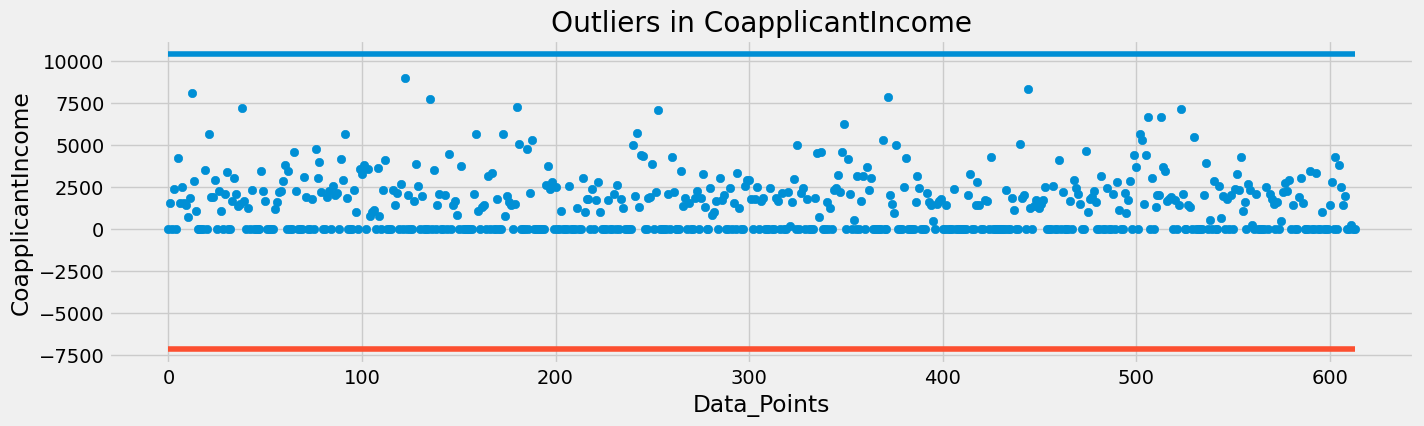

Upper_Limit :  398.0741431380211 
 Lower_Limit :  -106.56925714453575
Outliers_Present :  15


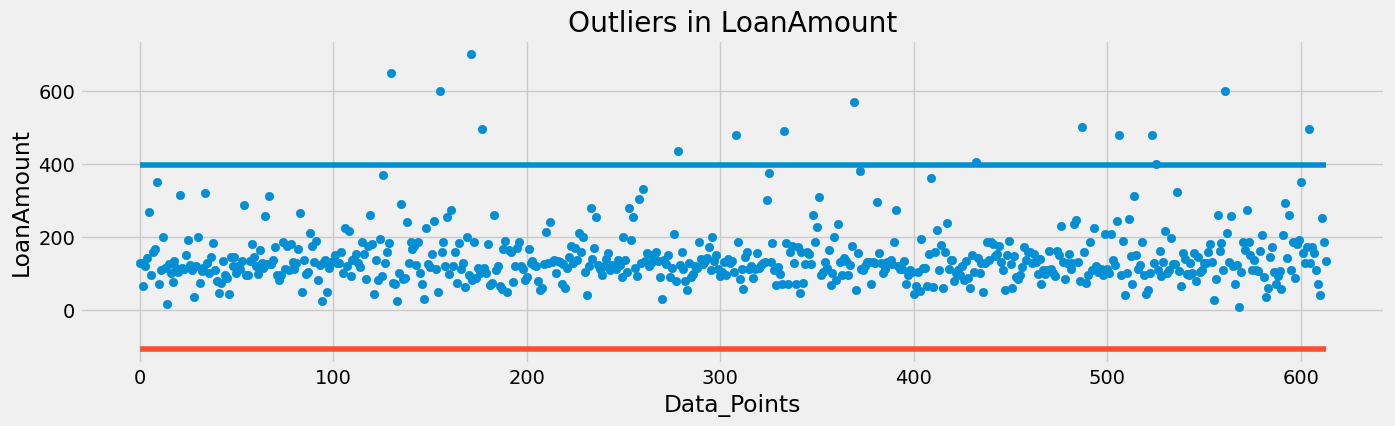

Fixing_Outliers :- 


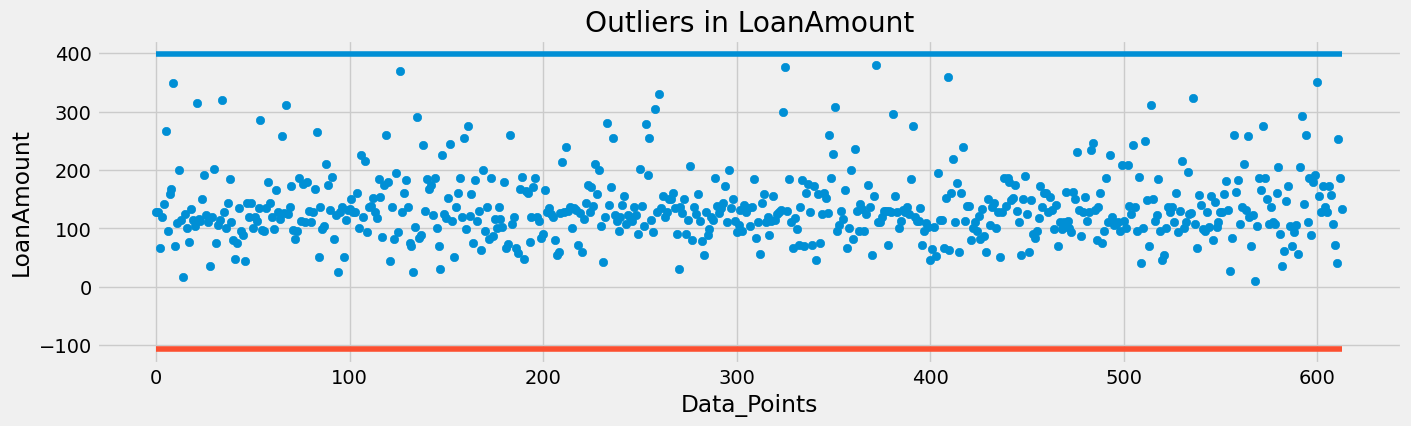

In [102]:
OUTLIERS_DETECT = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
for col in OUTLIERS_DETECT:
 data=detectoutlierszscore(data,col)

# ***UNIVARIATE DATA ANALYSIS***

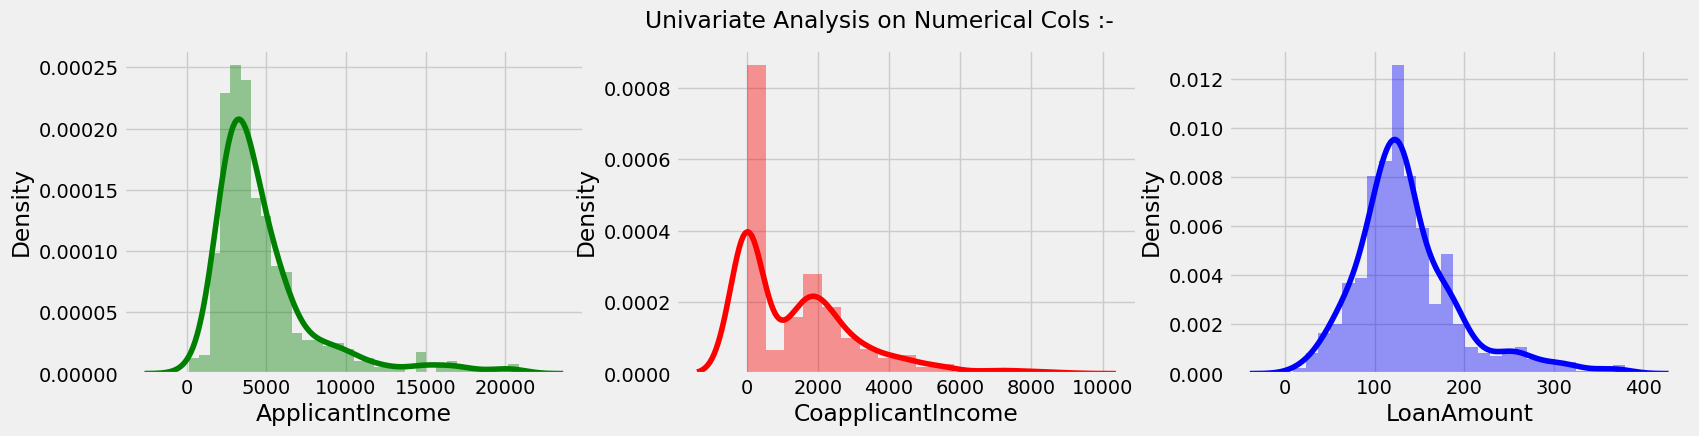

In [103]:
# Univariate Analysis on Numeric Cols :-

plt.rcParams['figure.figsize']=(18,4)

plt.subplot(1,3,1)
sns.distplot(data['ApplicantIncome'],color='green')

plt.subplot(1,3,2)
sns.distplot(data['CoapplicantIncome'],color='red')

plt.subplot(1,3,3)
sns.distplot(data['LoanAmount'],color='blue')

plt.suptitle('Univariate Analysis on Numerical Cols :-')
plt.show()

In [104]:
# NOTE - Coapplicant's data is not Normally Distributed, lets check the skewness :-

# NOTE - close to 0 is good skewness.

print('Applicant : ', data['ApplicantIncome'].skew())
print('CoApplicant : ',data['CoapplicantIncome'].skew())

Applicant :  2.28921373487618
CoApplicant :  1.3868128056847533


In [105]:
print('After sqrt transformation on Applicant : ',np.sqrt(data['ApplicantIncome']).skew())
print('After sqrt transformation on Coapplicant : ',np.sqrt(data['CoapplicantIncome']).skew())

After sqrt transformation on Applicant :  1.3358447009794918
After sqrt transformation on Coapplicant :  0.25284827729787934


In [106]:
print('After cbrt transformation on Applicant : ',np.cbrt(data['ApplicantIncome']).skew())
print('After cbrt transformation on Coapplicant : ',np.cbrt(data['CoapplicantIncome']).skew())

After cbrt transformation on Applicant :  0.9603755702983885
After cbrt transformation on Coapplicant :  6.264522909214305e-06


In [107]:
print('After log transformation on Applicant : ',np.log(data['ApplicantIncome']+1).skew())
print('After log transformation on Coapplicant : ',np.log(data['CoapplicantIncome']+1).skew())

After log transformation on Applicant :  -0.10043505181434265
After log transformation on Coapplicant :  -0.1836996274899833


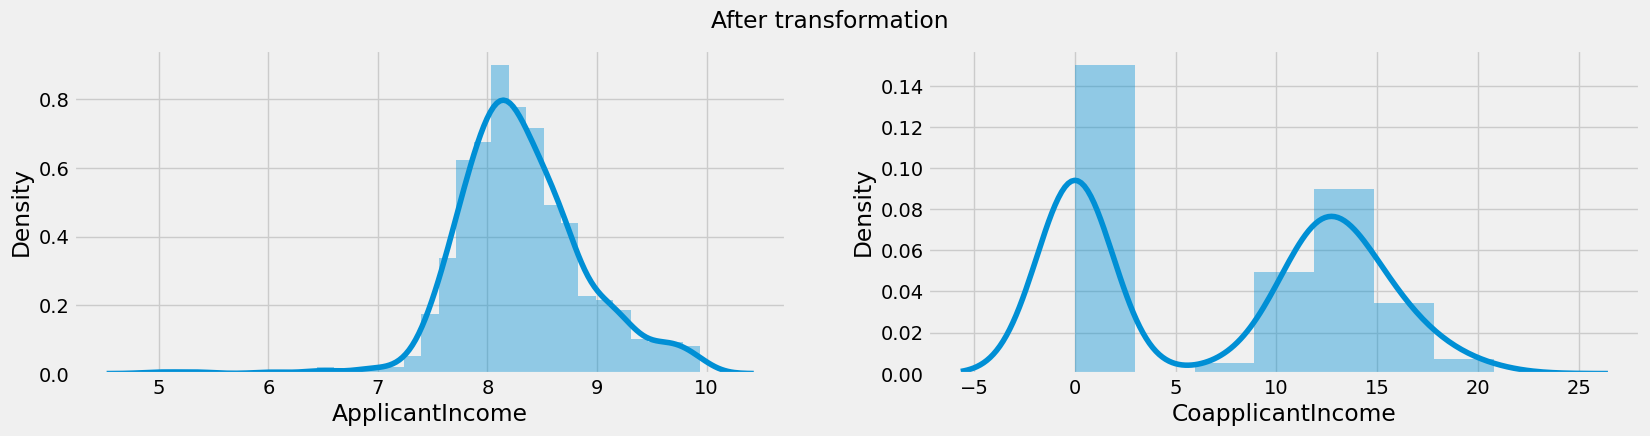

In [108]:
# Now remove skewness from the data :-

import warnings
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize']=(18,4)

data['CoapplicantIncome']=np.cbrt(data['CoapplicantIncome'])
data["ApplicantIncome"]=np.log(data['ApplicantIncome'])

# Now plot these transformed cols :-

plt.subplot(1,2,1)
sns.distplot(data['ApplicantIncome'])

plt.subplot(1,2,2)
sns.distplot(data['CoapplicantIncome'])

plt.suptitle('After transformation')
plt.show()

In [109]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

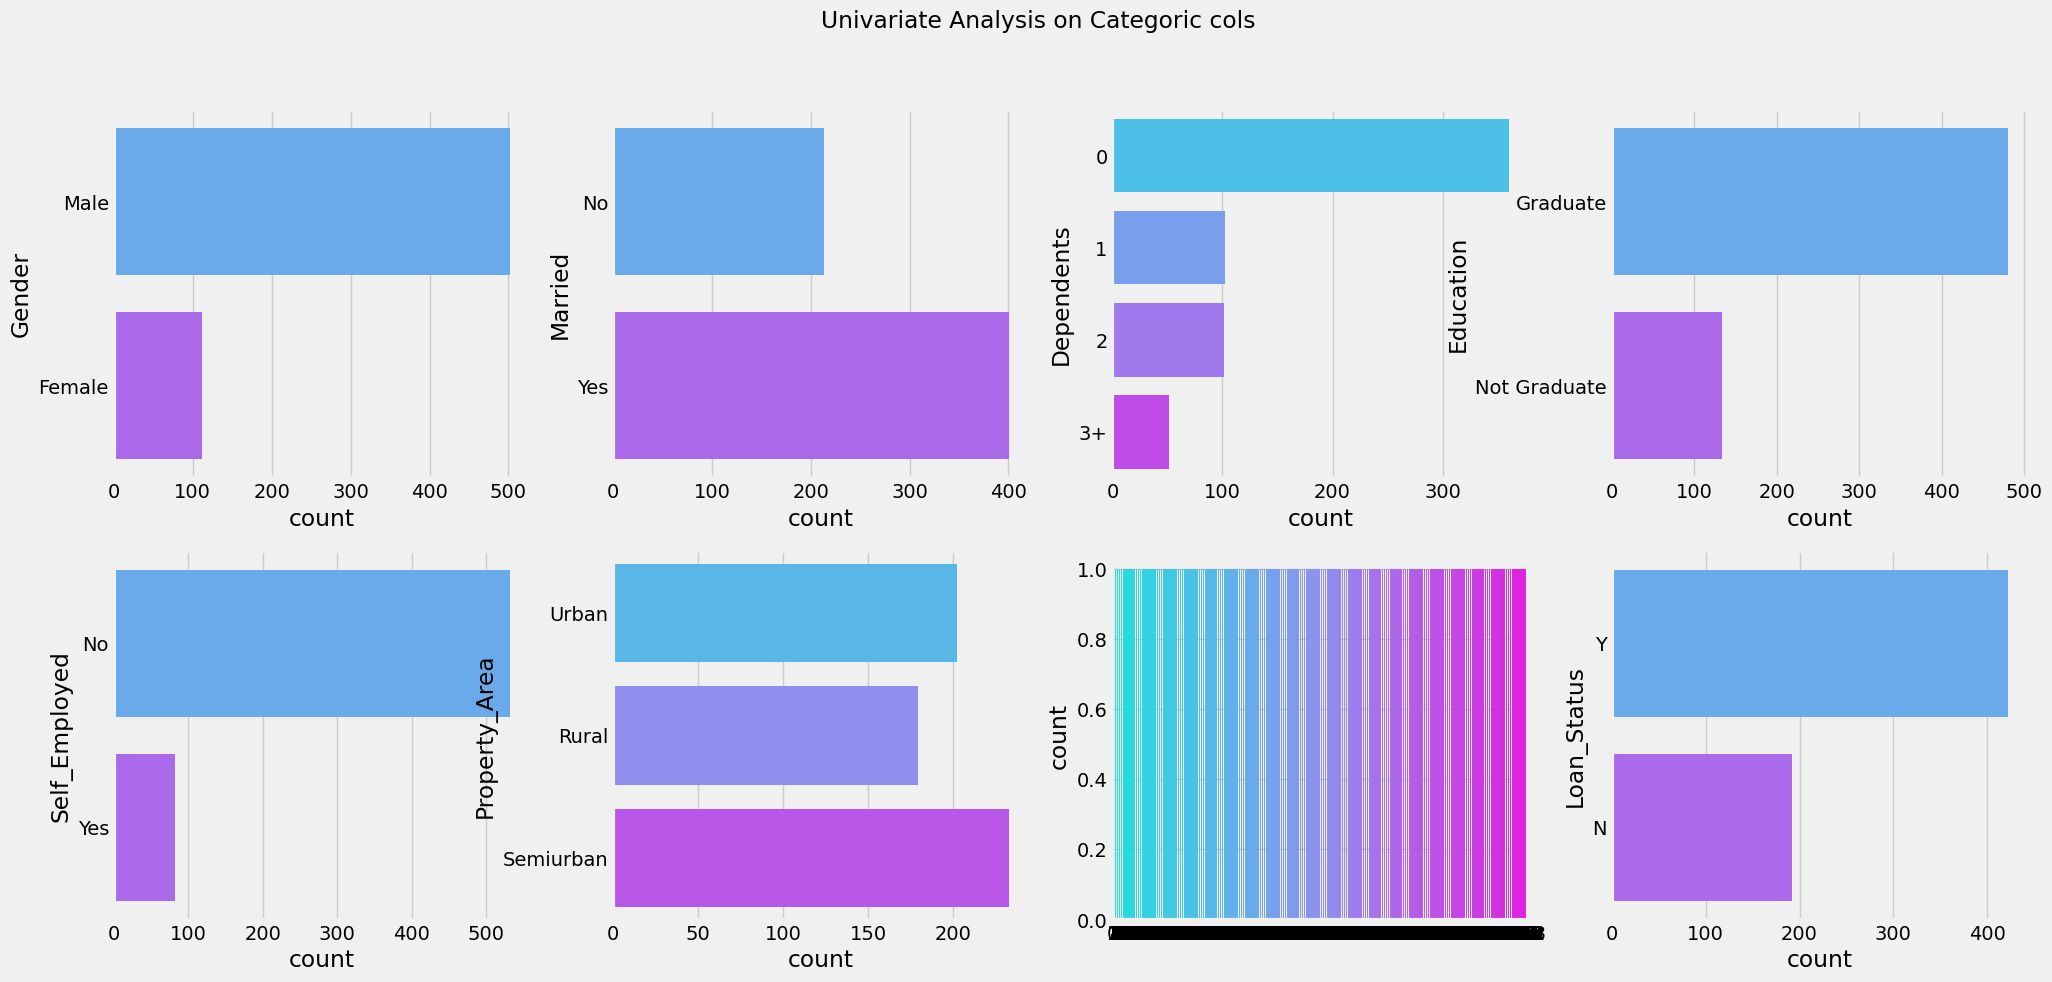

In [110]:
# Uni-variate Analysis on Categoric cols :-

plt.rcParams['figure.figsize'] = (22,10)

plt.subplot(2,4,1)
sns.countplot(data['Gender'],palette='cool')

plt.subplot(2,4,2)
sns.countplot(data['Married'],palette='cool')

plt.subplot(2,4,3)
sns.countplot(data['Dependents'],palette='cool')

plt.subplot(2,4,4)
sns.countplot(data['Education'],palette='cool')

plt.subplot(2,4,5)
sns.countplot(data['Self_Employed'],palette='cool')

plt.subplot(2,4,6)
sns.countplot(data['Property_Area'],palette='cool')

plt.subplot(2,4,7)
sns.countplot(data['Credit_History'],palette='cool')

plt.subplot(2,4,8)
sns.countplot(data['Loan_Status'],palette='cool')

plt.suptitle('Univariate Analysis on Categoric cols')
plt.show()

# ***Bi-Variate Analysis***

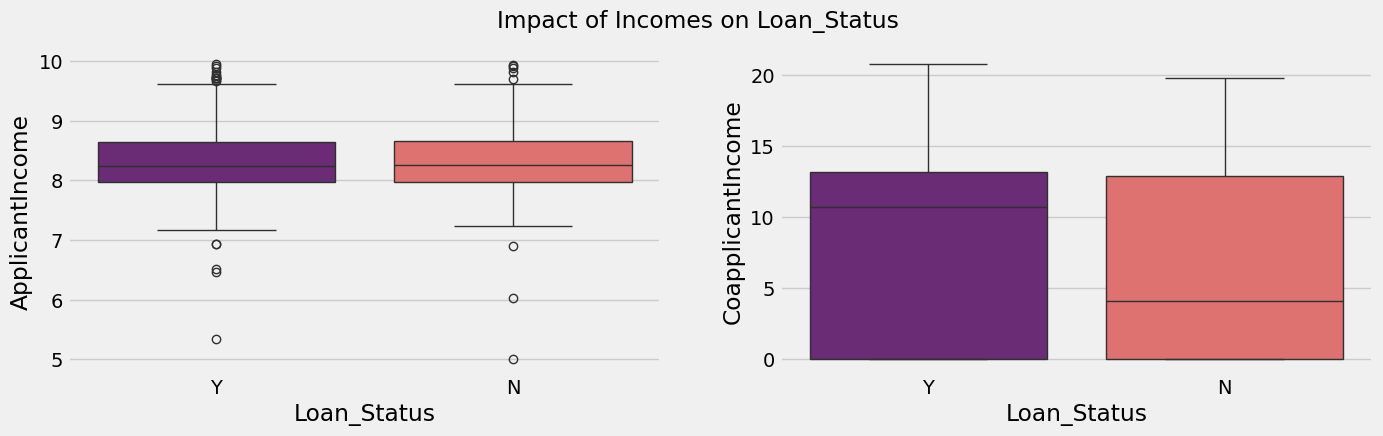

In [111]:
# Lets check the impact of income of Applicant and Coapplicant on the loan status :-

plt.rcParams['figure.figsize'] = (15, 4)

plt.subplot(1,2,1)
sns.boxplot(x=data['Loan_Status'],y=data['ApplicantIncome'],palette='magma')

plt.subplot(1,2,2)
sns.boxplot(x=data['Loan_Status'],y=data['CoapplicantIncome'],palette='magma')

plt.suptitle('Impact of Incomes on Loan_Status')
plt.show()

# ***Comparing categoric cols with target col***

In [112]:
# Comparing all the categoric cols wrt Loan Status to understand overall Impact

print('Impact of Gender on Loan_Status :-')
print(pd.crosstab(data['Gender'],data['Loan_Status']))
print('\n')

print('Impact of Marriage on Loan_Status :-')
print(pd.crosstab(data['Married'],data['Loan_Status']))
print('\n')

print('Impact of Dependents on Loan_Status :-')
print(pd.crosstab(data['Dependents'],data['Loan_Status']))
print('\n')

print('Impact of Education on Loan_Status :-')
print(pd.crosstab(data['Education'],data['Loan_Status']))
print('\n')

print('Impact of Self_Employed on Loan_Status :-')
print(pd.crosstab(data['Self_Employed'],data['Loan_Status']))
print('\n')

print('Impact of Property_Area on Loan_Status :-')
print(pd.crosstab(data['Property_Area'],data['Loan_Status']))
print('\n')

Impact of Gender on Loan_Status :-
Loan_Status    N    Y
Gender               
Female        37   75
Male         155  347


Impact of Marriage on Loan_Status :-
Loan_Status    N    Y
Married              
No            79  134
Yes          113  288


Impact of Dependents on Loan_Status :-
Loan_Status    N    Y
Dependents           
0            113  247
1             36   66
2             25   76
3+            18   33


Impact of Education on Loan_Status :-
Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82


Impact of Self_Employed on Loan_Status :-
Loan_Status      N    Y
Self_Employed          
No             166  366
Yes             26   56


Impact of Property_Area on Loan_Status :-
Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      54  179
Urban          69  133




In [113]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,8.674026,0.000000,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,8.430109,11.467457,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,8.006368,0.000000,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,7.856707,13.310098,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,8.699515,0.000000,141.0,360.0,1.0,Urban,Y


In [114]:
# delete the Loan_Id

data.drop(['Loan_ID'],axis=1,inplace=True)

# ***Encoding (Manual)***

In [115]:
data['Gender']=data['Gender'].replace({'Male':1,'Female':0})
data['Married']=data['Married'].replace(('Yes','No'),(1,0))
data['Education']=data['Education'].replace(('Graduate','Non Graduate','Not Graduate'),(1,0,0))
data['Self_Employed']=data['Self_Employed'].replace(('Yes','No'), (1, 0))
data['Loan_Status'] = data['Loan_Status'].replace(('Y','N'), (1, 0))

# as seen above that Urban and Semi Urban Property have very similar Impact on Loan Status, so, we will merge them together
data['Property_Area'] = data['Property_Area'].replace(('Urban','Semiurban', 'Rural'),(1, 1, 0))

# as seen above that apart from 0 dependents, all are similar hence, we merge them to avoid any confusion
data['Dependents'] = data['Dependents'].replace(('0', '1', '2', '3+'), (0, 1, 1, 1))

data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,8.674026,0.000000,128.0,360.0,1.0,1,1
1,1,1,1,1,0,8.430109,11.467457,128.0,360.0,1.0,0,0
2,1,1,0,1,1,8.006368,0.000000,66.0,360.0,1.0,1,1
3,1,1,0,0,0,7.856707,13.310098,120.0,360.0,1.0,1,1
4,1,0,0,1,0,8.699515,0.000000,141.0,360.0,1.0,1,1


In [116]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    float64
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(5), int64(7)
memory usage: 57.7 KB


In [117]:
# Split the Dataset :-

y=data['Loan_Status']
x=data.drop(['Loan_Status'],axis=1)

In [118]:
print('Shape of x : ',x.shape)
print('Shape of y : ',y.shape)

Shape of x :  (614, 11)
Shape of y :  (614,)


In [119]:
data['Loan_Status'].value_counts()

Loan_Status
1    422
0    192
Name: count, dtype: int64

In [120]:
# As the data is highly imbalanced, we need to balance it using imblearn

from imblearn.over_sampling import SMOTE

x_resample,y_resample=SMOTE().fit_resample(x,y)

print(x_resample.shape)
print(y_resample.shape)

(844, 11)
(844,)


In [121]:
# lets also check the value counts of our target variable

print("Before Resampling :")
print(y.value_counts())

print("After Resampling :")
print(y_resample.value_counts())

Before Resampling :
Loan_Status
1    422
0    192
Name: count, dtype: int64
After Resampling :
Loan_Status
1    422
0    422
Name: count, dtype: int64


In [122]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=0.2,random_state=4)

# lets print the shapes again
print("Shape of the x Train :", x_train.shape)
print("Shape of the y Train :", y_train.shape)
print("Shape of the x Test :", x_test.shape)
print("Shape of the y Test :", y_test.shape)

Shape of the x Train : (675, 11)
Shape of the y Train : (675,)
Shape of the x Test : (169, 11)
Shape of the y Test : (169,)


# ***Machine Learning Model***

In [123]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print('Training_Set_Accuracy : ',model.score(x_train,y_train))
print('Testing_set_Accuracy : ',model.score(x_test,y_test))

Training_Set_Accuracy :  0.7570370370370371
Testing_set_Accuracy :  0.7928994082840237


In [124]:
from sklearn.ensemble import AdaBoostClassifier
model=AdaBoostClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print('Training_Set_Accuracy : ',model.score(x_train,y_train))
print('Testing_Set_Accuracy : ',model.score(x_test,y_test))

Training_Set_Accuracy :  0.8355555555555556
Testing_Set_Accuracy :  0.7869822485207101


# ***CONFUSION MATRIX AND CLASSIFICATION REPORT***

In [125]:
from sklearn.metrics import confusion_matrix,classification_report

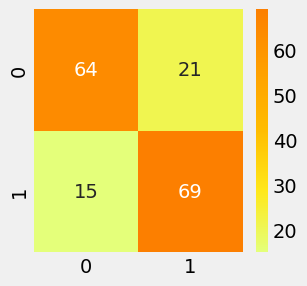

              precision    recall  f1-score   support

           0       0.81      0.75      0.78        85
           1       0.77      0.82      0.79        84

    accuracy                           0.79       169
   macro avg       0.79      0.79      0.79       169
weighted avg       0.79      0.79      0.79       169



In [126]:
plt.rcParams['figure.figsize']=(3,3)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Wistia',fmt='0.8g')
plt.show()

# Let's do the classification report for performance analysis :-
cr=classification_report(y_test,y_pred)
print(cr)

In [127]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(min_samples_split=7)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

print('Training_Set_Accuracy : ',model.score(x_train,y_train))
print('Testing_Set_Accuracy : ',model.score(x_test,y_test))

Training_Set_Accuracy :  0.9614814814814815
Testing_Set_Accuracy :  0.8402366863905325


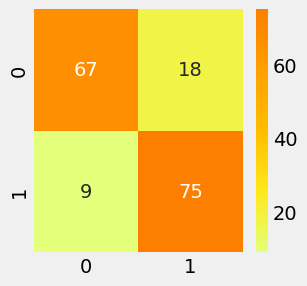

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        85
           1       0.81      0.89      0.85        84

    accuracy                           0.84       169
   macro avg       0.84      0.84      0.84       169
weighted avg       0.84      0.84      0.84       169



In [128]:
plt.rcParams['figure.figsize']=(3,3)
cm=confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True,cmap='Wistia',fmt='0.8g')
plt.show()

# Let's do the classification report for performance analysis :-
cr=classification_report(y_test,y_pred)
print(cr)

In [129]:
from sklearn.ensemble import GradientBoostingClassifier
model=GradientBoostingClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

print("Training Accuracy :", model.score(x_train, y_train))
print("Testing Accuracy :", model.score(x_test, y_test))

Training Accuracy : 0.8948148148148148
Testing Accuracy : 0.8284023668639053


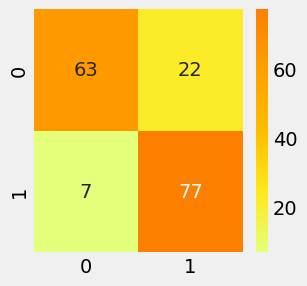

              precision    recall  f1-score   support

           0       0.90      0.74      0.81        85
           1       0.78      0.92      0.84        84

    accuracy                           0.83       169
   macro avg       0.84      0.83      0.83       169
weighted avg       0.84      0.83      0.83       169



In [130]:
cm = confusion_matrix(y_test, y_pred)
plt.rcParams['figure.figsize'] = (3, 3)
sns.heatmap(cm, annot = True, cmap = 'Wistia', fmt = '.8g')
plt.show()

# lets also use classification report for performance analysis
cr = classification_report(y_test, y_pred)
print(cr)

In [131]:
from sklearn.model_selection import cross_val_score # Splits data into N parts, where every part has Training and Testing sets
# Returns model.score on each split
# 1. We want scores on all splits to be uniform
# 2. Final score can be considered as average of all scores

clf = RandomForestClassifier(n_estimators=500, min_samples_split=3, min_samples_leaf=3, max_features=0.2)
scores = cross_val_score(clf, x_train, y_train, cv=5)
print(scores)

[0.78518519 0.8        0.77777778 0.83703704 0.8       ]


In [132]:
np.mean(scores)

0.8

In [133]:
score=model.score(x_test,y_test)
score

0.8284023668639053

In [222]:
# Comparing all the Models :-

models=[LogisticRegression,AdaBoostClassifier,RandomForestClassifier,GradientBoostingClassifier]
Model=[]
Training_set=[]
Testing_set=[]
for mod in models:
  Model.append(mod())
  mod=mod()
  mod.fit(x_train,y_train)

  Training_set.append(mod.score(x_train,y_train))
  Testing_set.append(mod.score(x_test,y_test))
print('Model',Model,'\n','Traning_set',Training_set,'\n','Testing_set',Testing_set)

Model [LogisticRegression(), AdaBoostClassifier(), RandomForestClassifier(), GradientBoostingClassifier()] 
 Traning_set [0.7481481481481481, 0.8355555555555556, 1.0, 0.8948148148148148] 
 Testing_set [0.7633136094674556, 0.7869822485207101, 0.8579881656804734, 0.8284023668639053]


In [226]:
dic={'Model':Model,'Training_set_accuracy':Training_set,'Testing_set_accuracy':Testing_set}
pd.DataFrame(dic)

,Model,Training_set_accuracy,Testing_set_accuracy
0,LogisticRegression(),0.748148,0.763314
1,AdaBoostClassifier(),0.835556,0.786982
2,RandomForestClassifier(),1.000000,0.857988
3,GradientBoostingClassifier(),0.894815,0.828402


In [ ]:
# The RandomForestClassifier is  giving the best accuracy but the model is overfitted a little-bit. So the best model is = Gradientboostingclassifier